#DERIVACIÓN 1 EN REPOSO

In [52]:
import numpy as np
import pywt
import matplotlib.pyplot as plt


# Cargar los datos desde el archivo
data = np.loadtxt("C:/Users/Asus/Desktop/Repositorio/ISB-Grupo-5/Otros/Archivos_varios/Lab5_ECG/reposoD1.txt", comments='#',skiprows=4)

# Extraer la data
reposoD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(1, 15)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

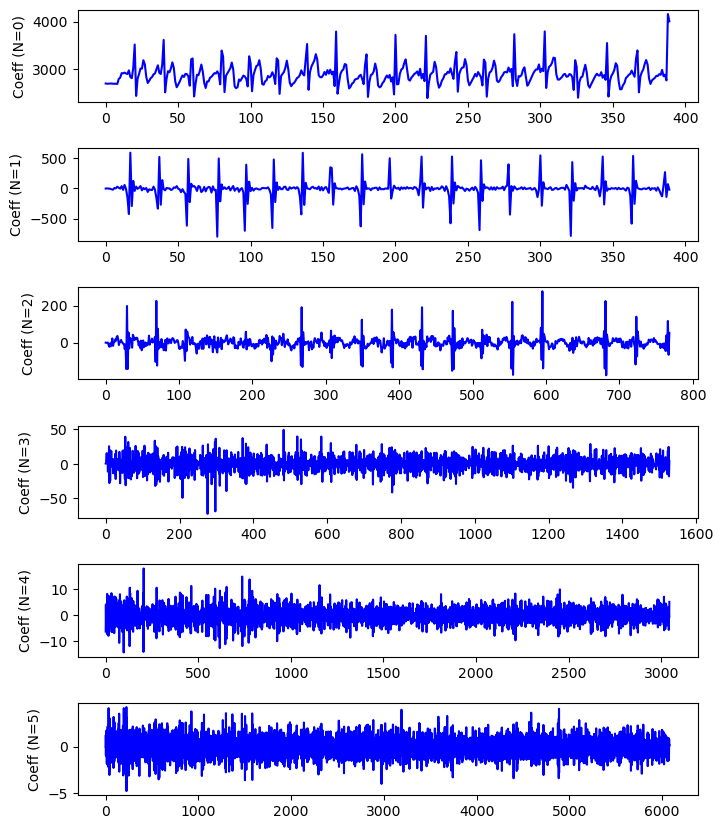

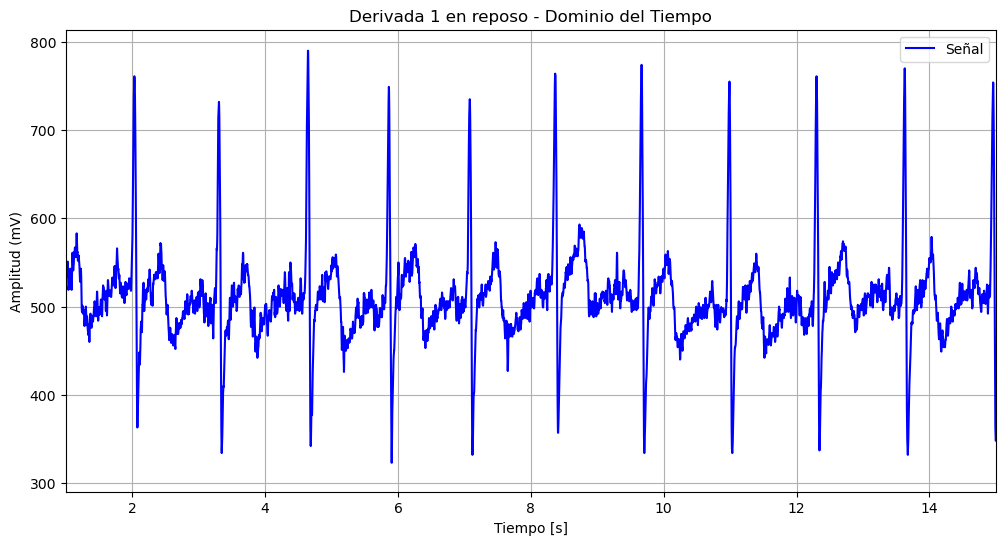

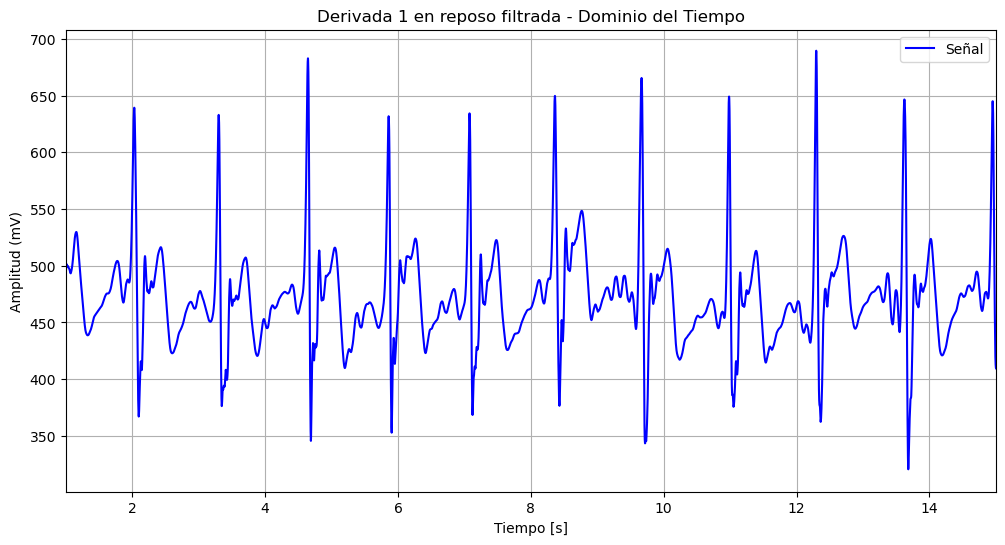

In [53]:
# Aplicar la transformada wavelet
wavelet = 'db6'  # Cambiado a db6 según lo sugerido en el trabajo de grado
level = 5
coeffs = pywt.wavedec(reposoD1, wavelet, level=level)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(8, 12))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff,color='b')
    plt.ylabel(f'Coeff (N={i})')

plt.subplots_adjust(hspace=0.5)

# Calcular el nivel de ruido y el nivel de la señal sobre la magnitud absoluta de la señal
noise_level = np.std(reposoD1)  # Estimación del nivel de ruido
n_samples = len(reposoD1)  # Estimación del nivel de la señal

# Manejo de excepciones para evitar RuntimeWarning si la señal no tiene variabilidad
threshold = noise_level * np.sqrt(2 * np.log(n_samples))

# Filtrar los coeficientes con el umbral calculado
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, wavelet)

# Ajustar la longitud de la señal filtrada al vector de tiempo
filtered_signal = filtered_signal[:len(t)]

def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t,signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(1, 15)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(reposoD1, 'Derivada 1 en reposo', fs)

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(filtered_signal, 'Derivada 1 en reposo filtrada', fs)

#DERIVACIÓN 1: MANTENIENDO LA RESPIRACIÓN POR 10 SEGUNDOS

In [54]:
# Cargar los datos desde el archivo
data = np.loadtxt("C:/Users/Asus/Desktop/Repositorio/ISB-Grupo-5/Otros/Archivos_varios/Lab5_ECG/RespD1.txt", comments='#',skiprows=4)

# Extraer la data
RespD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(RespD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(1, 15)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

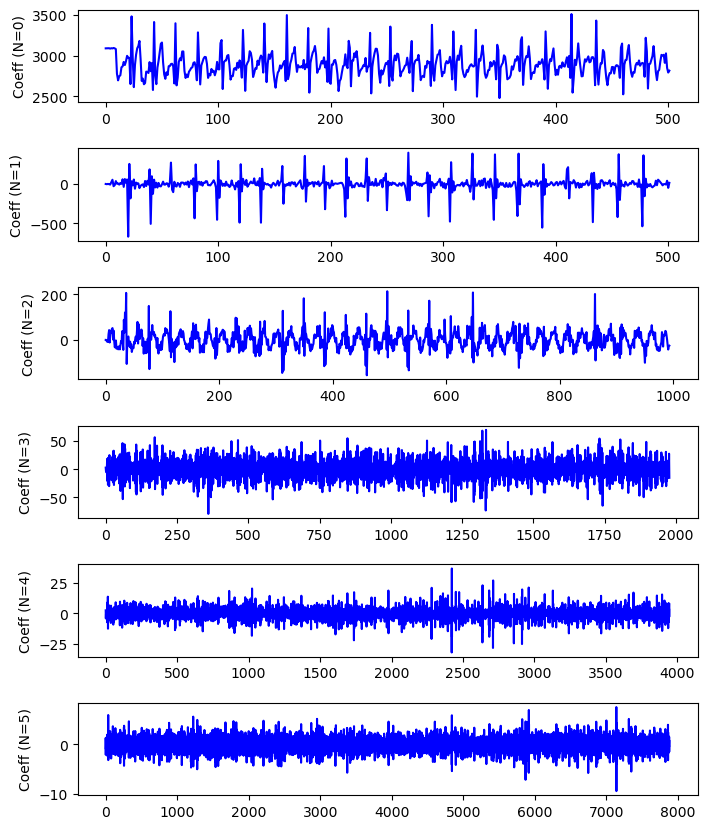

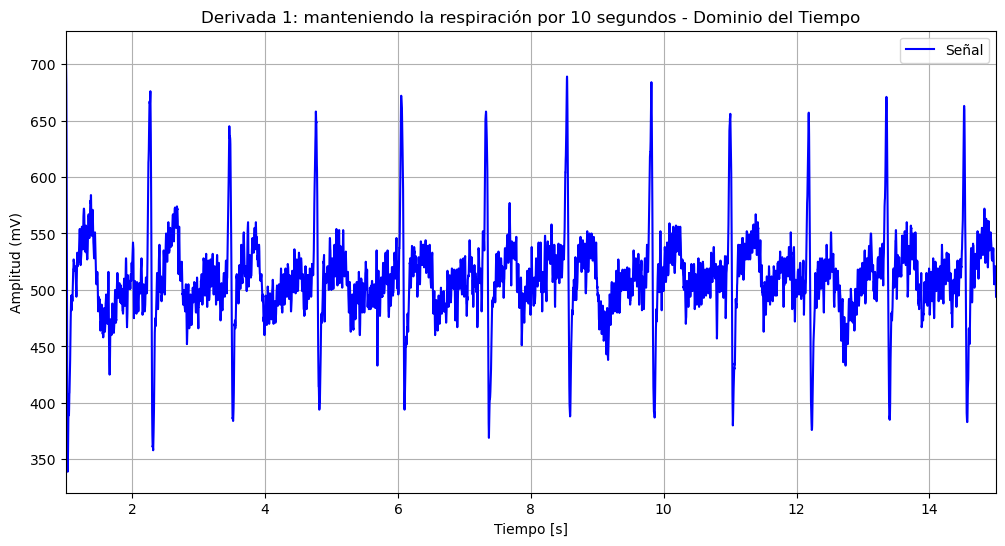

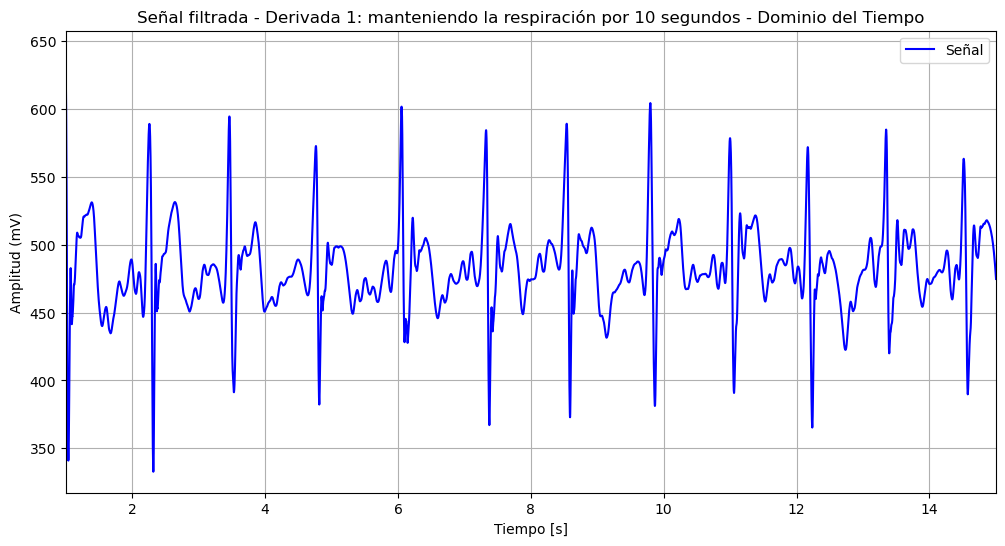

In [55]:
# Aplicar la transformada wavelet
wavelet = 'db6'  # Cambiado a db6 según lo sugerido en el trabajo de grado
level = 5
coeffs = pywt.wavedec(RespD1, wavelet, level=level)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(8, 12))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff,color='b')
    plt.ylabel(f'Coeff (N={i})')

plt.subplots_adjust(hspace=0.5)

# Calcular el nivel de ruido y el nivel de la señal sobre la magnitud absoluta de la señal
noise_level = np.std(RespD1)  # Estimación del nivel de ruido
n_samples = len(RespD1)  # Estimación del nivel de la señal

# Manejo de excepciones para evitar RuntimeWarning si la señal no tiene variabilidad
threshold = noise_level * np.sqrt(2 * np.log(n_samples))

# Filtrar los coeficientes con el umbral calculado
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, wavelet)

# Ajustar la longitud de la señal filtrada al vector de tiempo
filtered_signal = filtered_signal[:len(t)]

def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t,signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(1, 15)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(RespD1, 'Derivada 1: manteniendo la respiración por 10 segundos', fs)

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(filtered_signal, 'Señal filtrada - Derivada 1: manteniendo la respiración por 10 segundos', fs)

#DERIVACIÓN 1: DESPUÉS DE UNA ACTIVIDAD FÍSICA